### Visualize features of BGP dataset

#### Load datasets

In [1]:
import numpy as np

# Load the datasets
path_app = "src"
dataset0 = np.loadtxt("./%s/data_historical/Code_Red_I.csv" % path_app, delimiter=",")
dataset1 = np.loadtxt("./%s/data_historical/Nimda.csv" % path_app, delimiter=",")
dataset2 = np.loadtxt("./%s/data_historical/Slammer.csv" % path_app, delimiter=",")
dataset3 = np.loadtxt("./%s/data_historical/Moscow_blackout.csv" % path_app, delimiter=",")
dataset4 = np.loadtxt("./%s/data_historical/WannaCrypt.csv" % path_app, delimiter=",")
dataset5 = np.loadtxt("./%s/data_historical/RIPE_regular.csv" % path_app, delimiter=",")
dataset6 = np.loadtxt("./%s/data_historical/BCNET_regular.csv" % path_app, delimiter=",")
datasets = {"Code_Red_I": dataset0, "Nimda": dataset1, "Slammer": dataset2, "Moscow_blackout": dataset3, "WannaCrypt": dataset4, "RIPE_regular": dataset5, "BCNET_regular": dataset6}

# data_name = "Code_Red_I"
# data_name = "Nimda"
data_name = "Slammer"
dataset = datasets[data_name]


#### Feature definition
```
    Columns 1-4: time (column 1: hour+minute; column 2: hour; column 3: minute; column 4: second)
    Columns 5-41: features
    List of features extracted from BGP update messages:
    1. Number of announcements
    2. Number of withdrawals
    3. Number of announced NLRI prefixes
    4. Number of withdrawn NLRI prefixes
    5. Average AS-path length
    6. Maximum AS-path length
    7. Average unique AS-path length
    8. Number of duplicate announcements
    9. Number of implicit withdrawals
    10. Number of duplicate withdrawals
    11. Maximum edit distance
    12. Arrival rate [Number]
    13. Average edit distance
    14-23. Maximum AS-path length = n, where n = (11, ...,20)
    24-33. Maximum edit distance = n, where n = (7, ...,16)
    34. Number of Interior Gateway Protocol (IGP) packets
    35. Number of Exterior Gateway Protocol (EGP) packets
    36. Number of incomplete packets
    37: Packet size (B) [Average]
```
    This list comes from src/CSharp_Tool_BGP/Readme.md  
    The label is a binary value, 1 for anomaly and -1 for normal.  


#### Plot them

Dataset:  Slammer


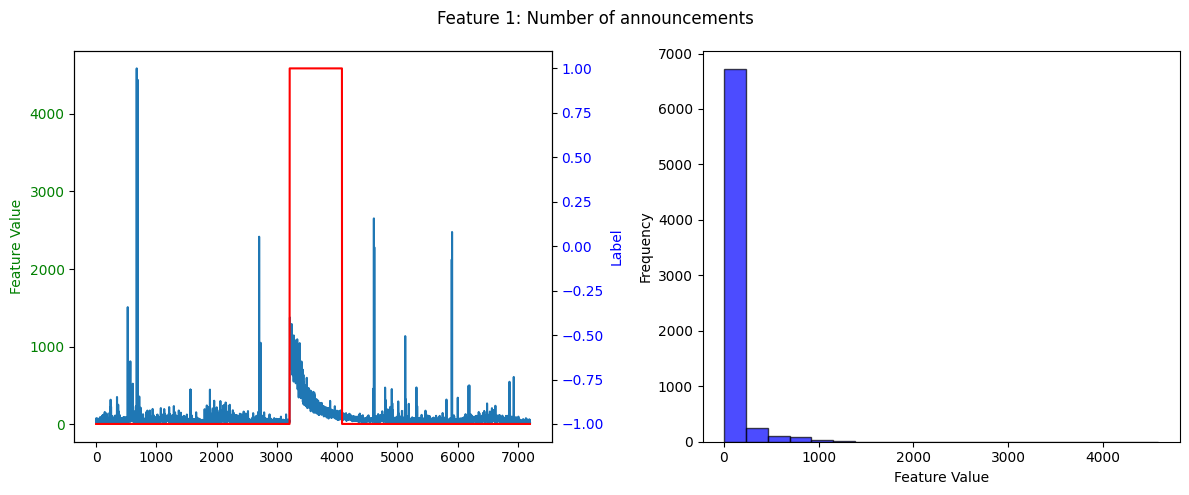

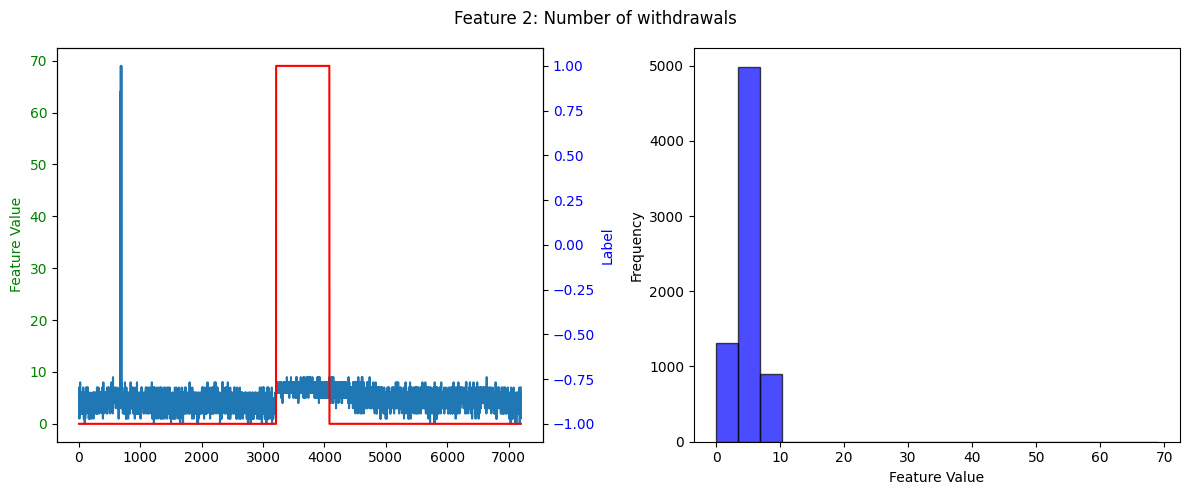

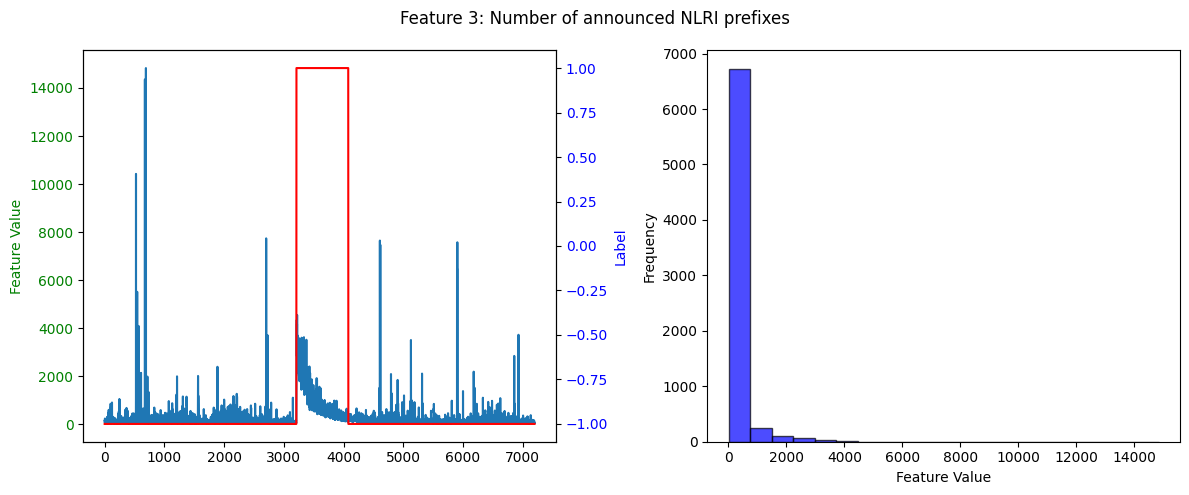

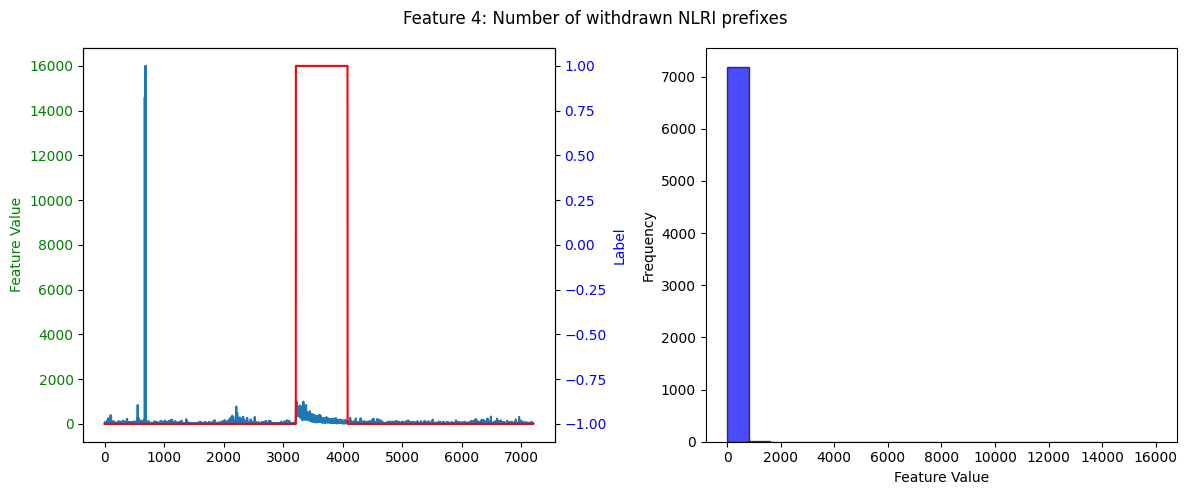

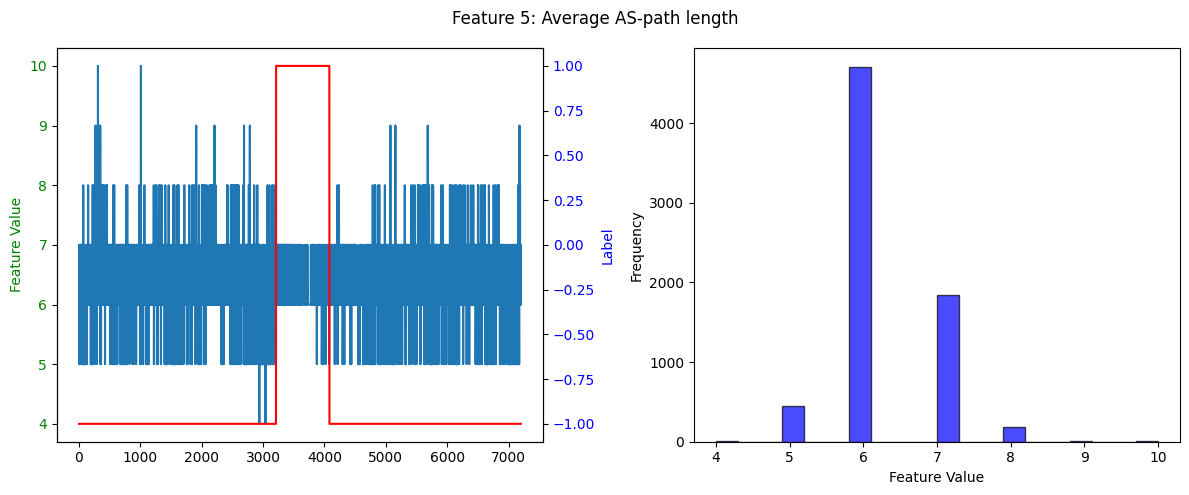

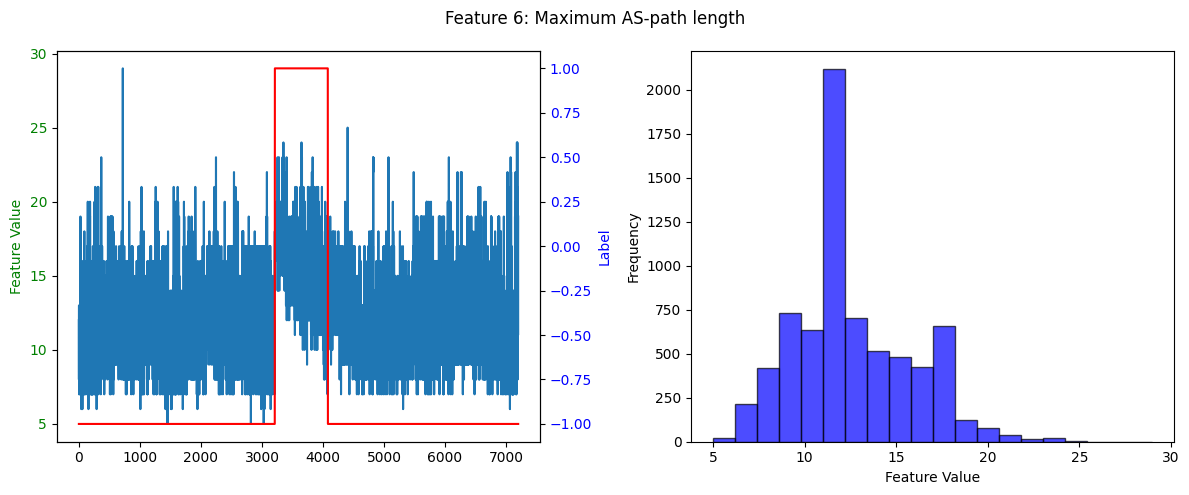

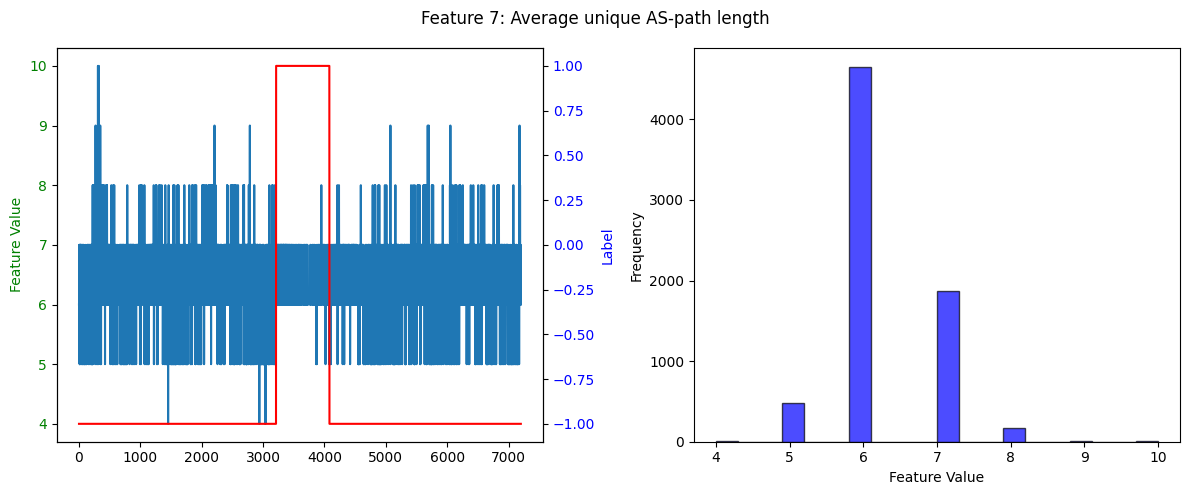

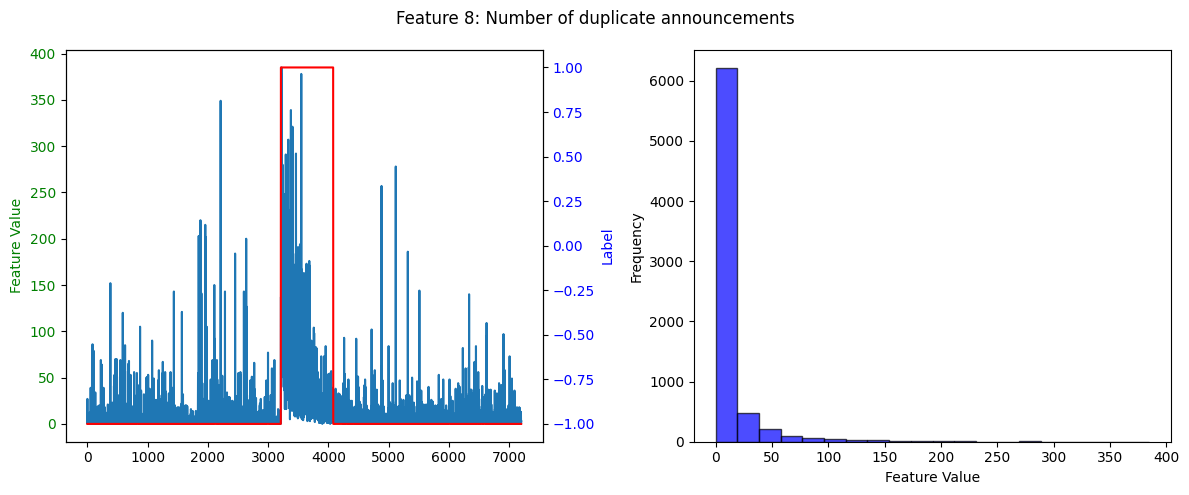

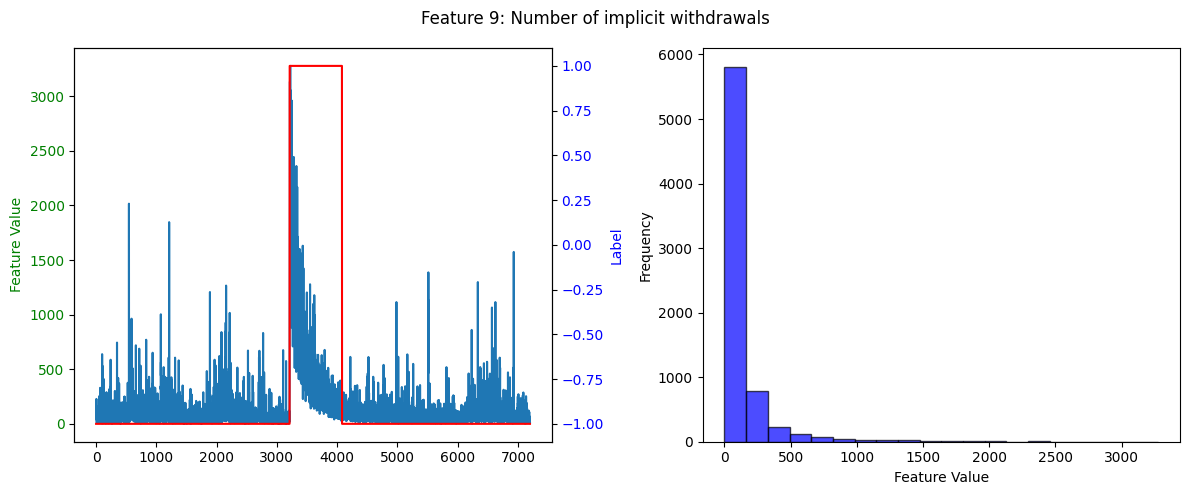

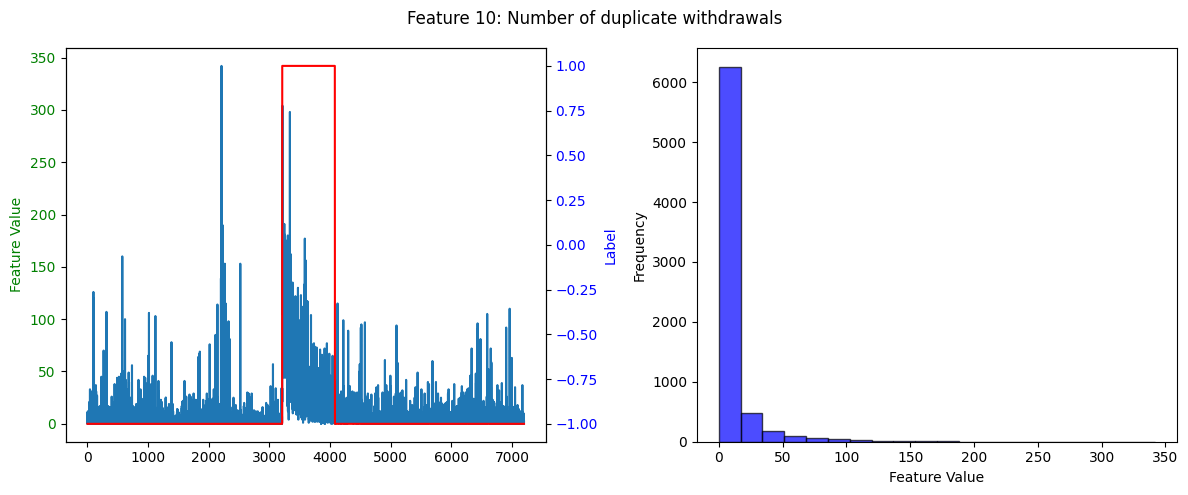

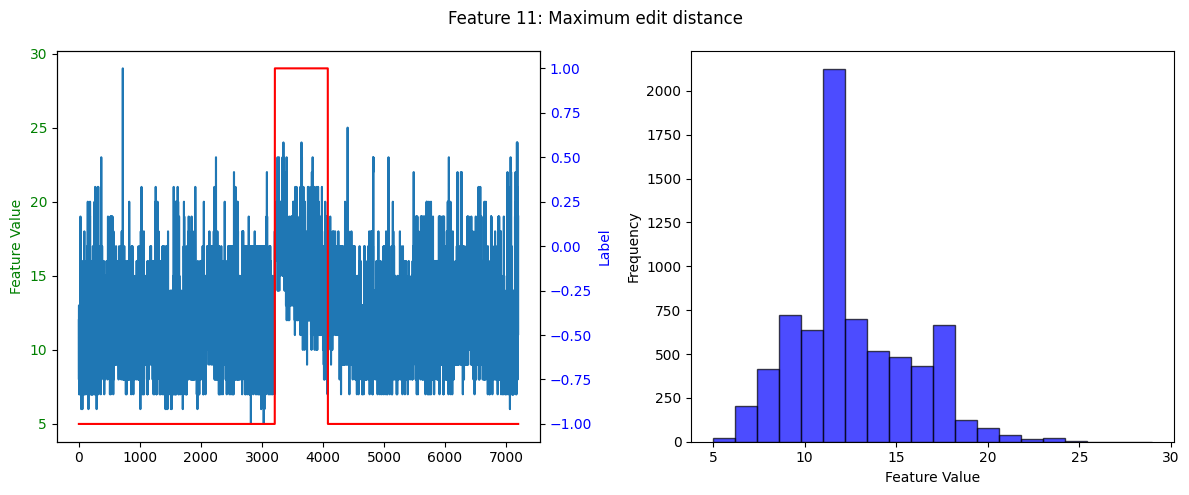

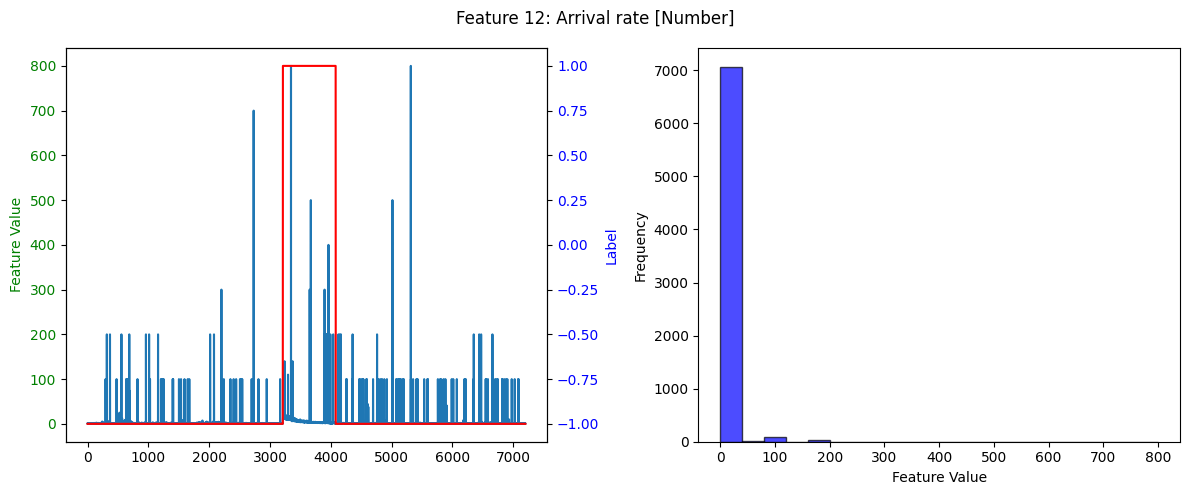

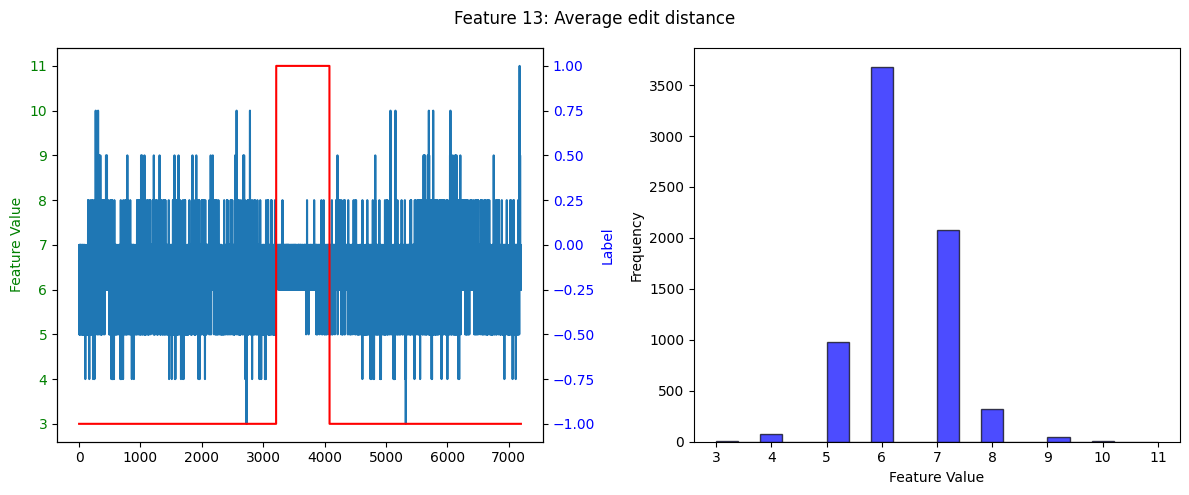

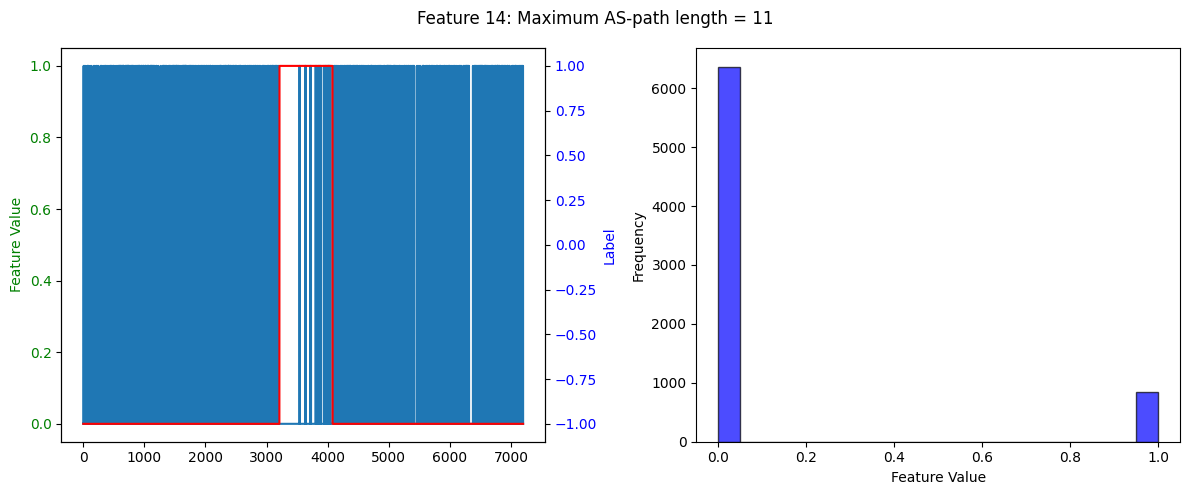

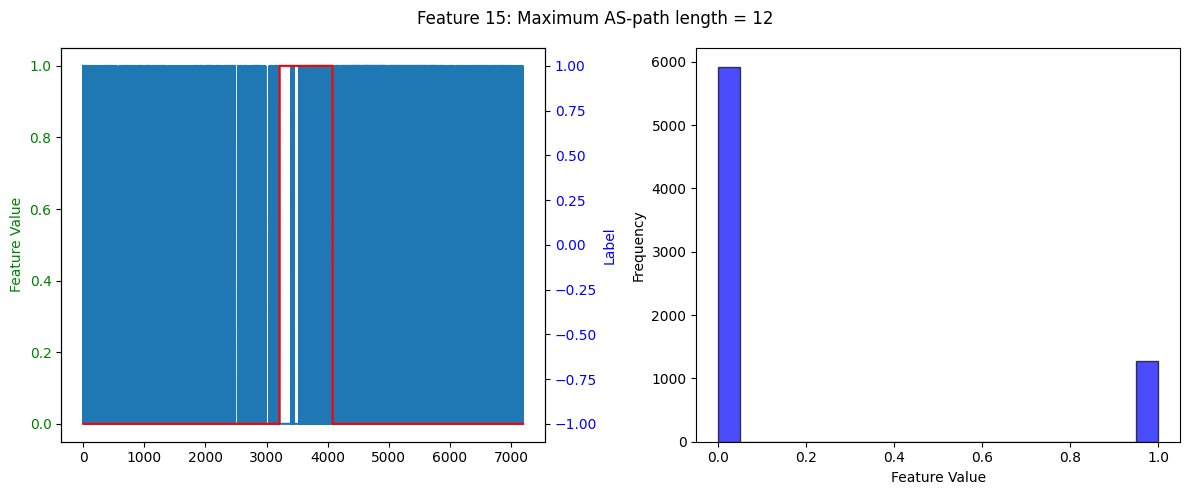

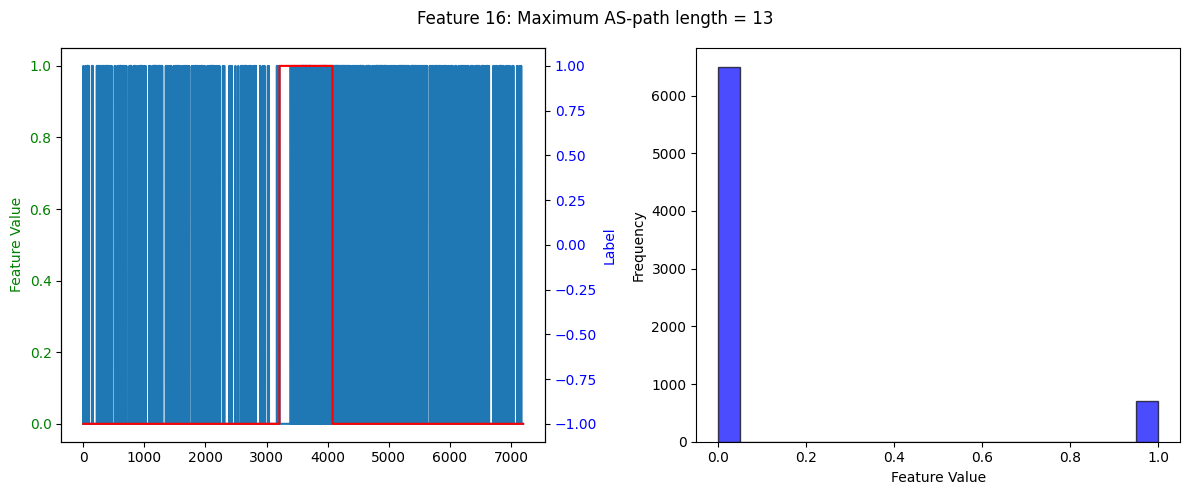

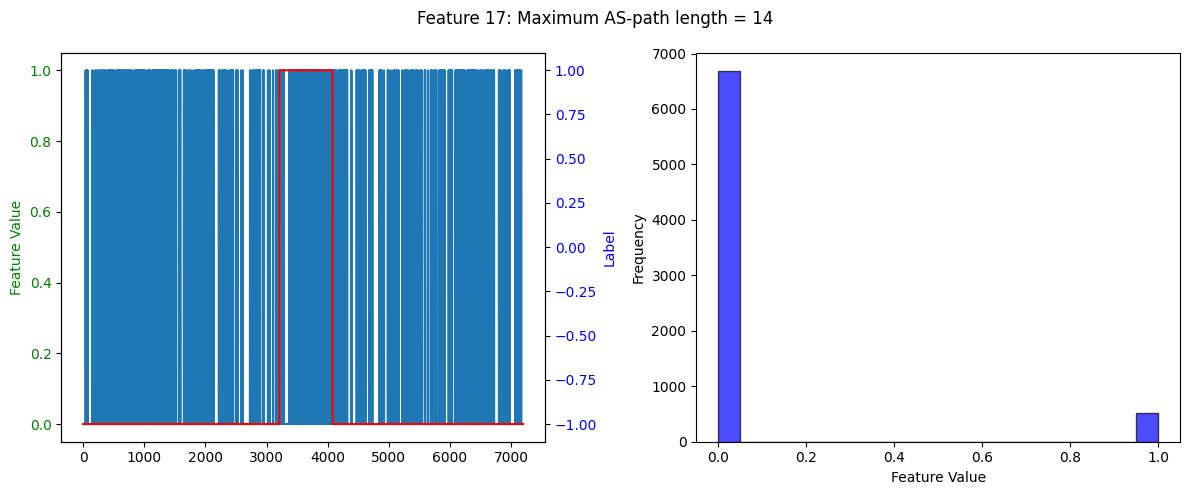

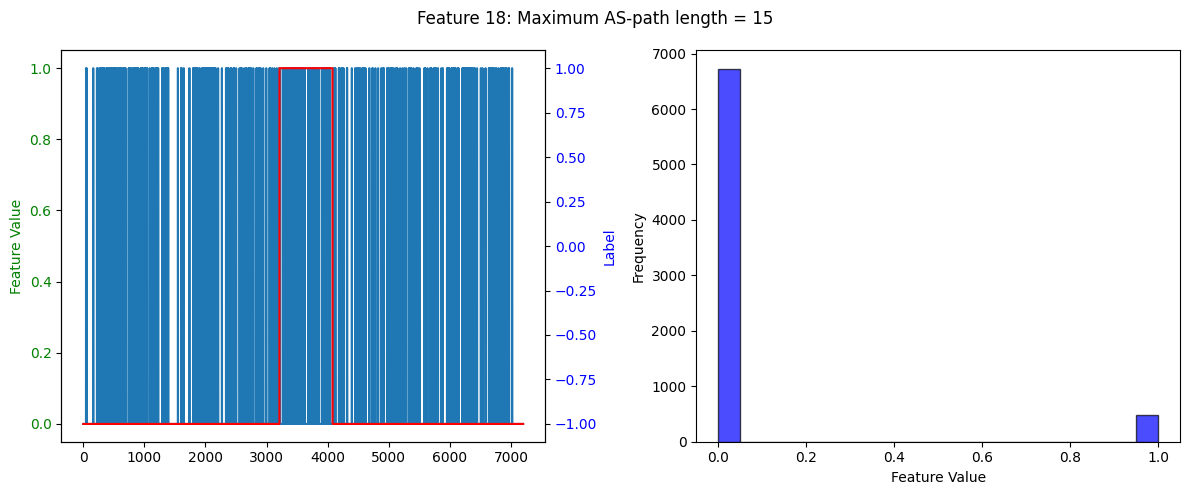

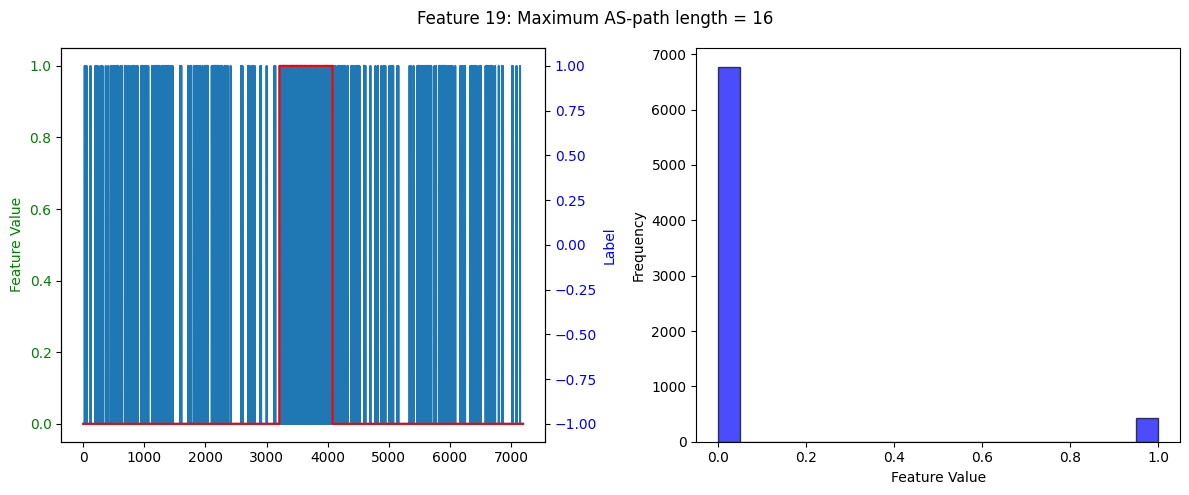

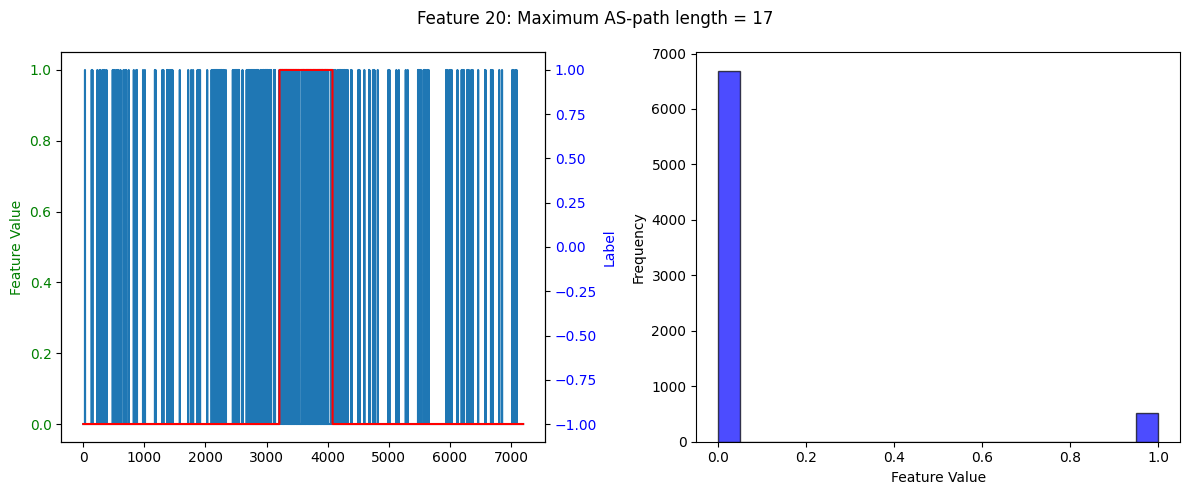

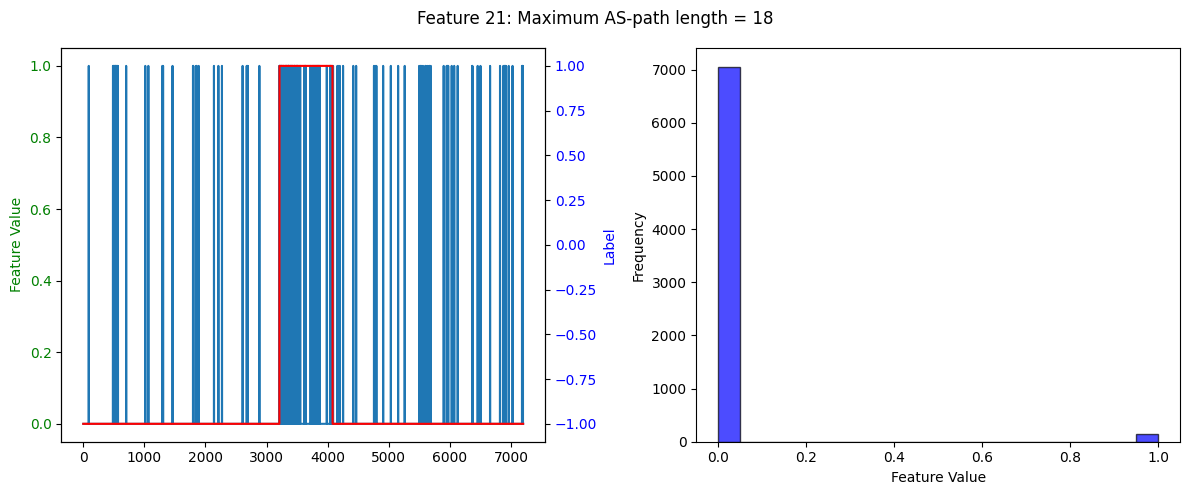

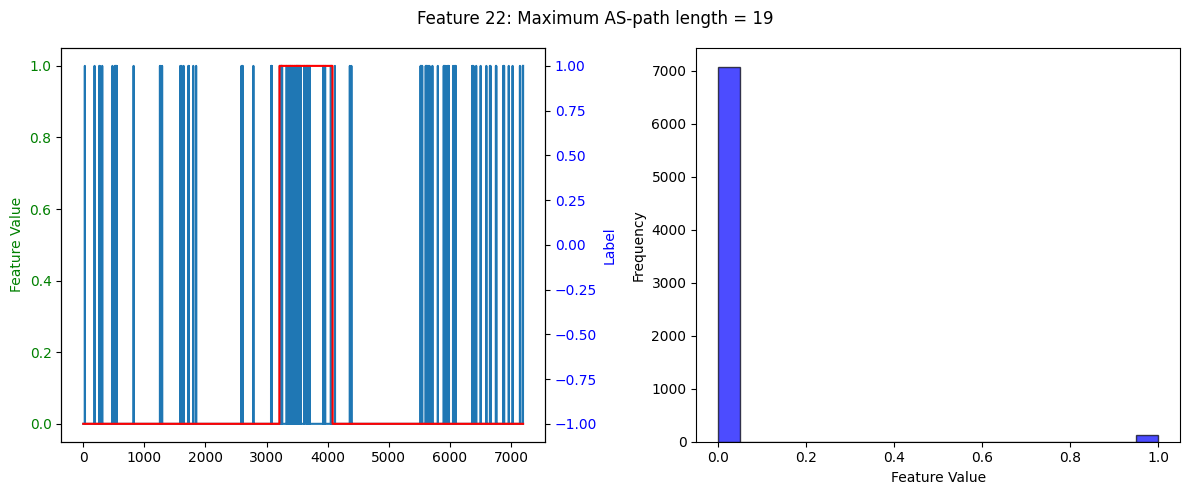

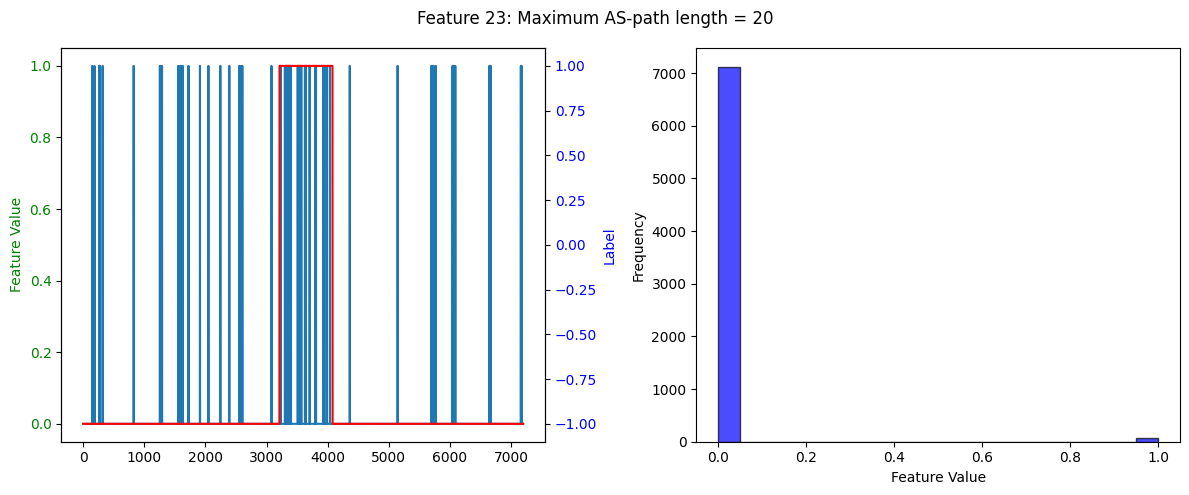

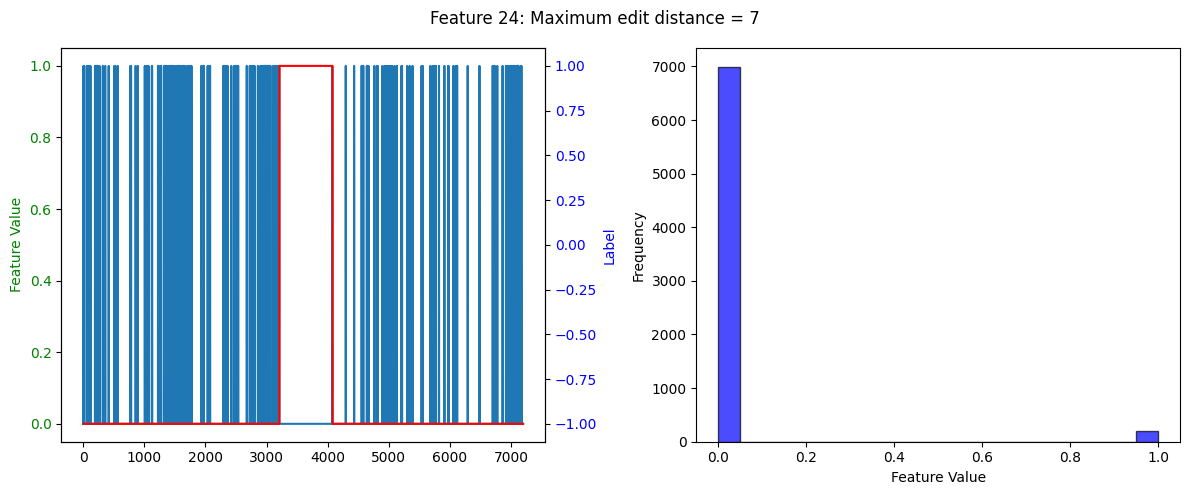

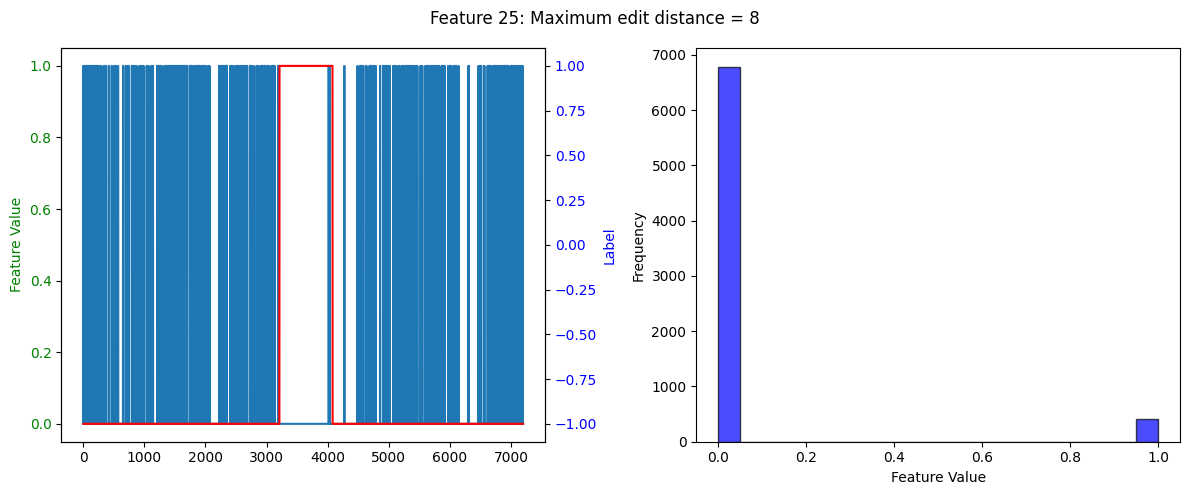

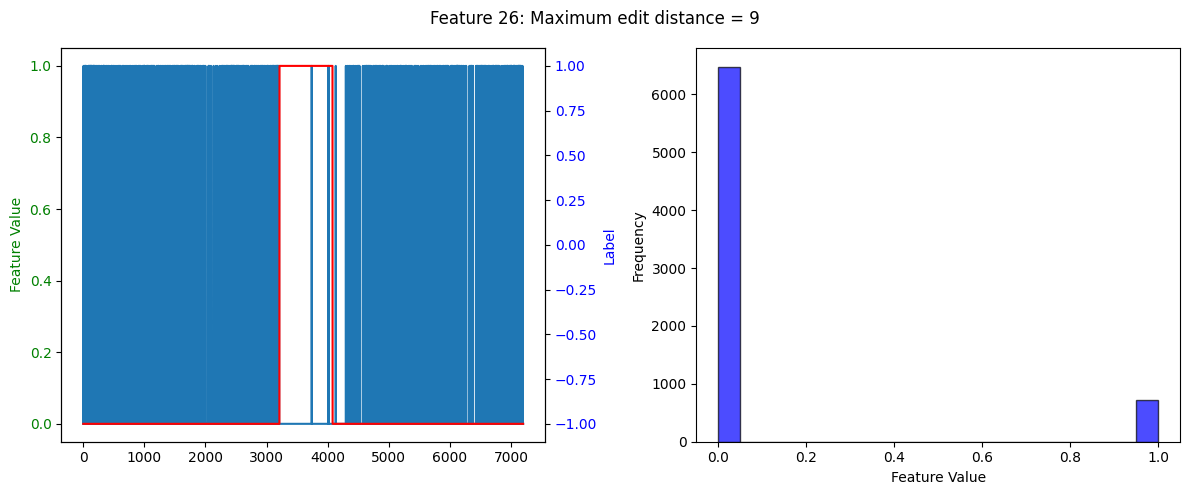

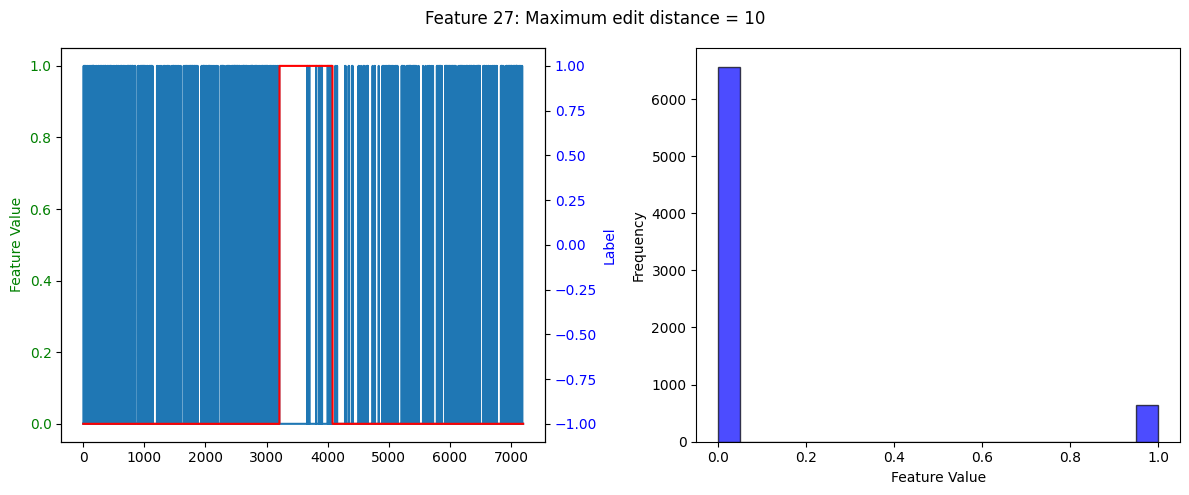

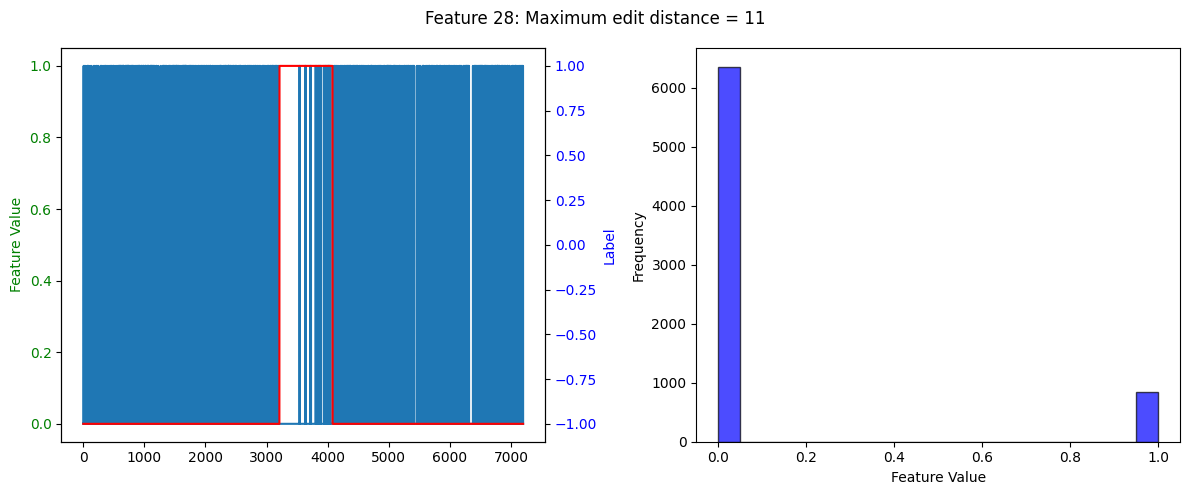

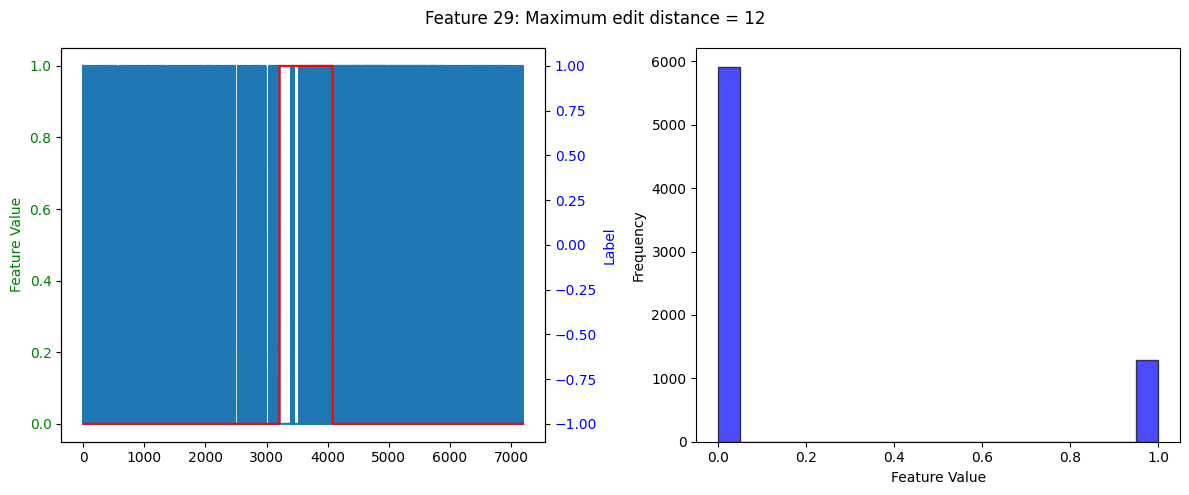

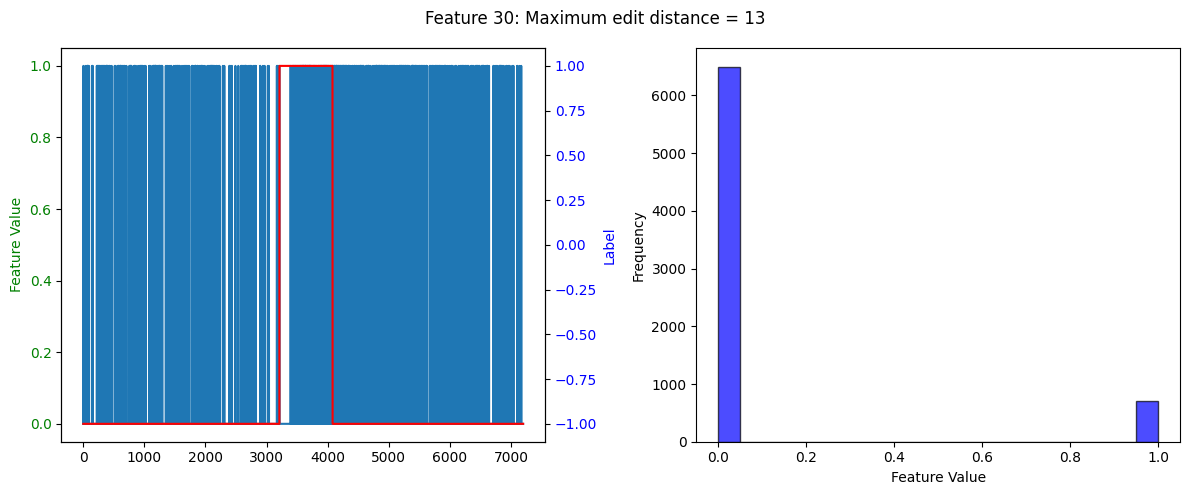

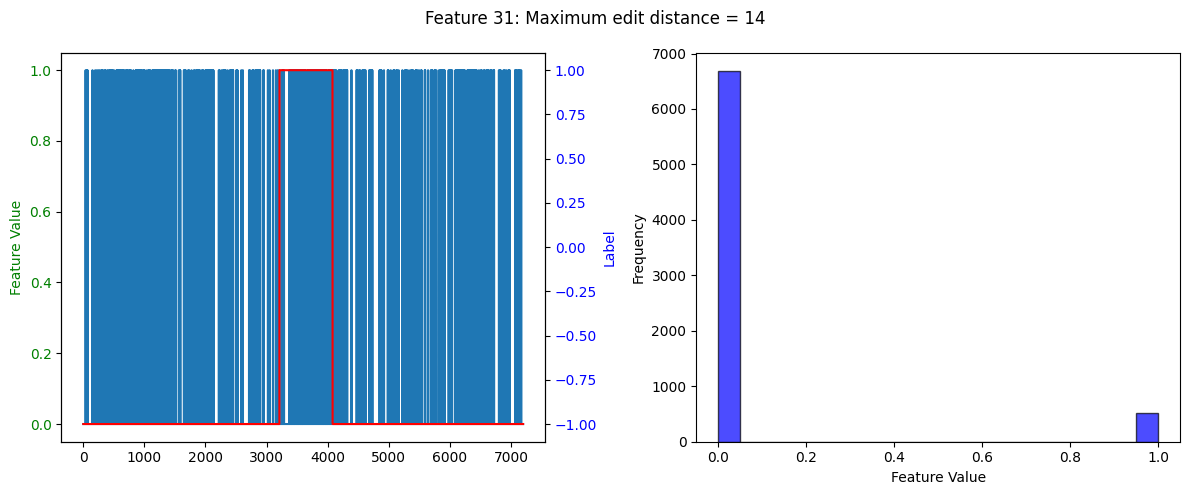

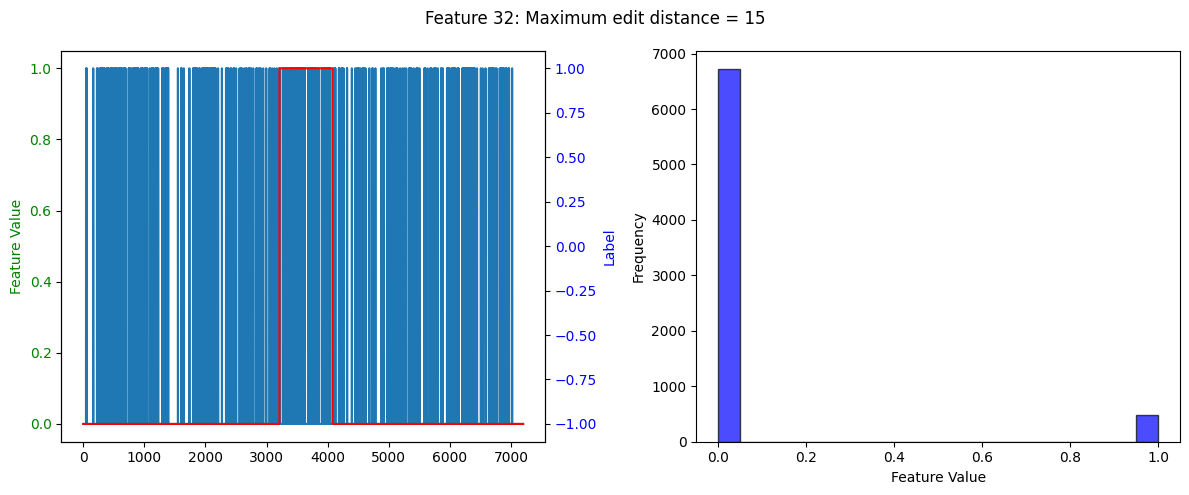

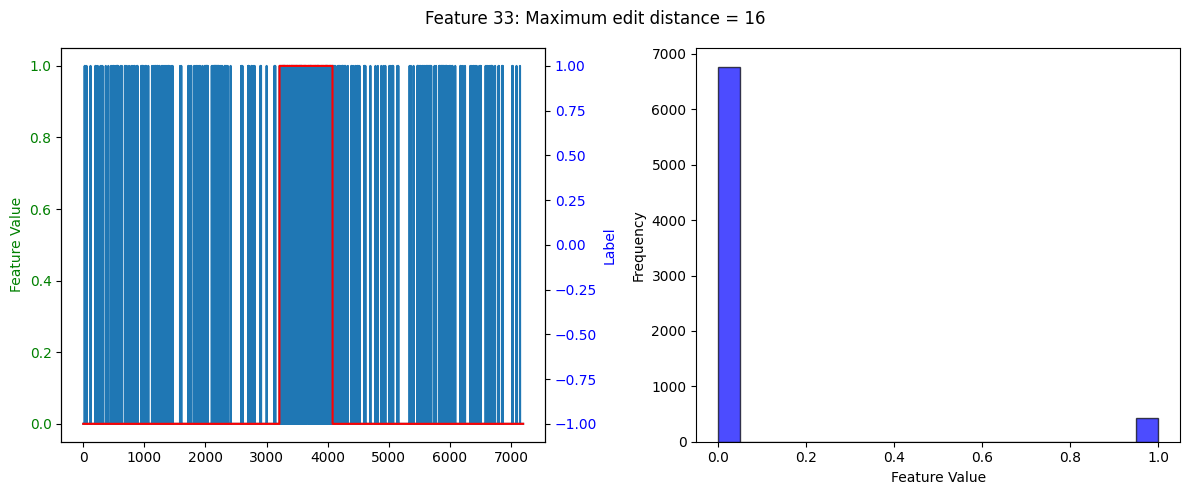

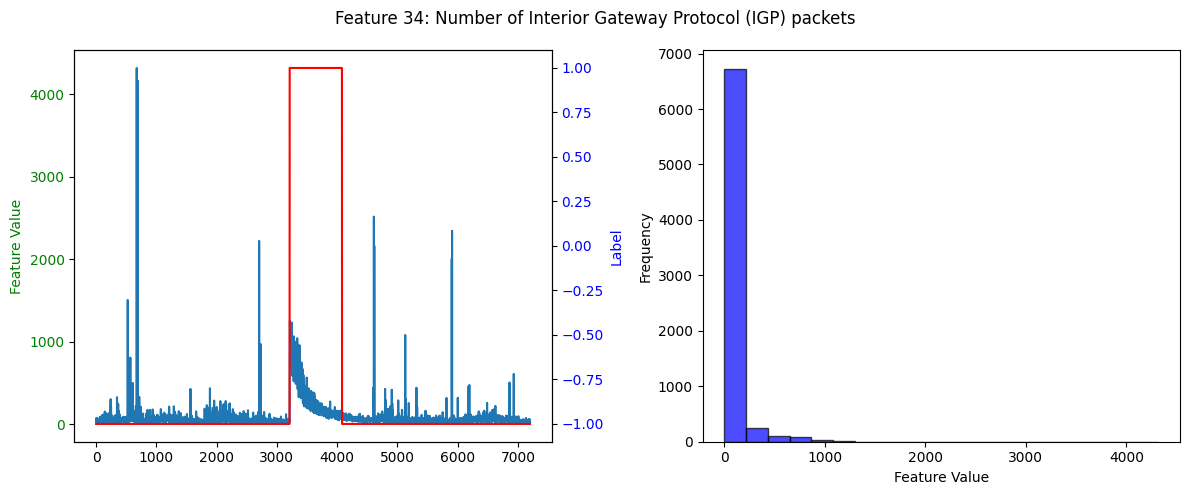

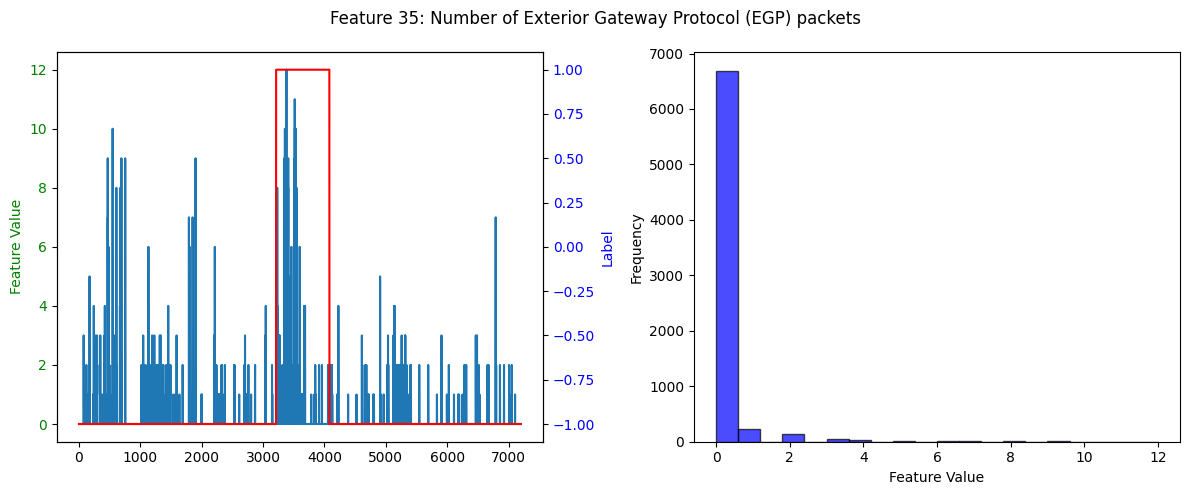

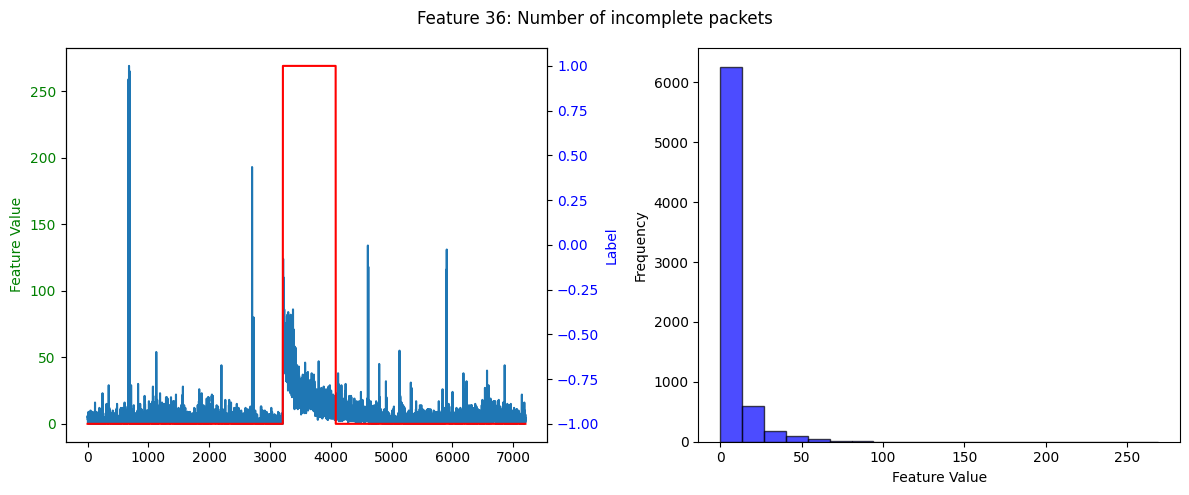

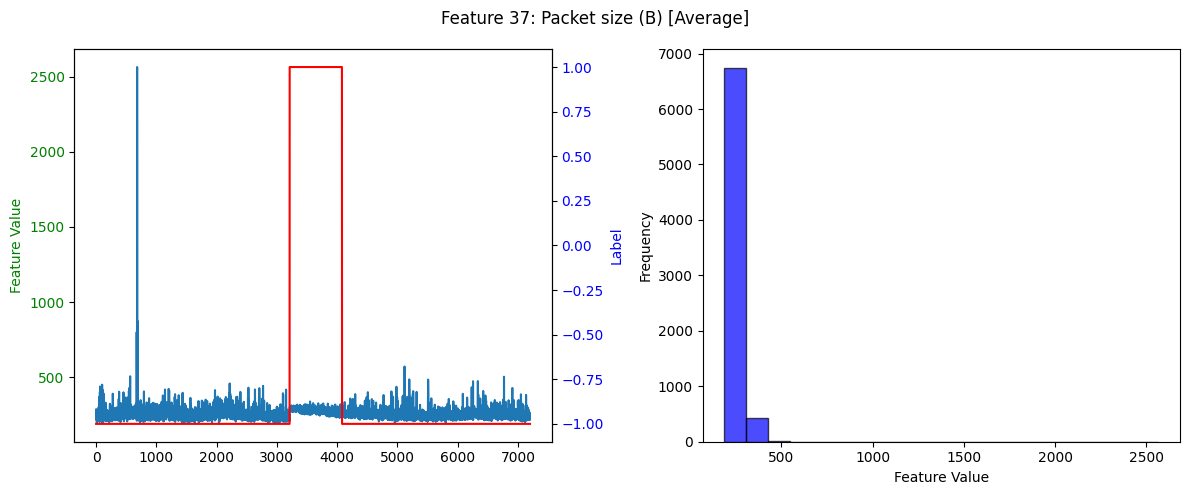

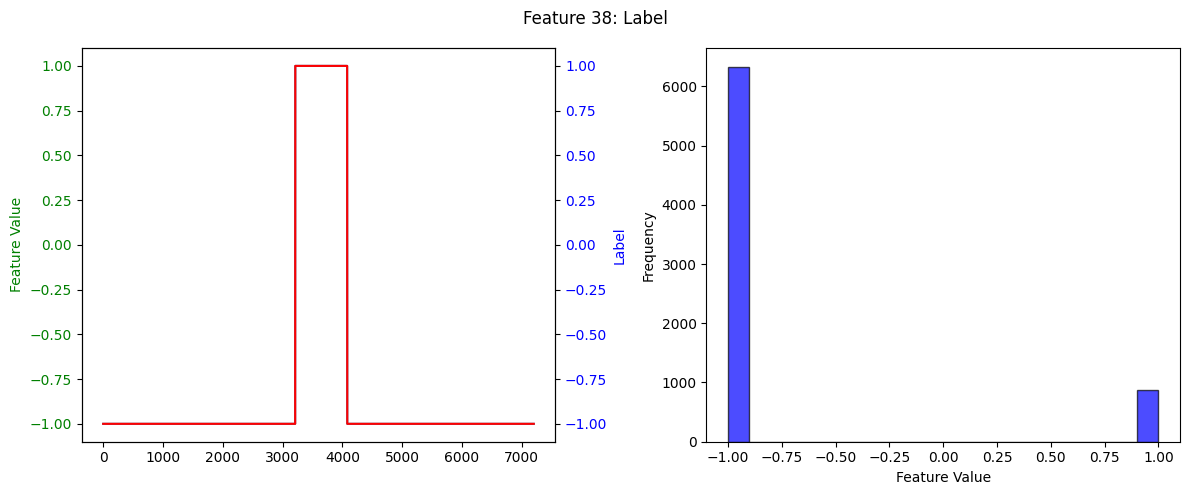

In [2]:
from src.xpr_plot import *

print("Dataset: ", data_name)
# Plot all features in a dataset
for i in range(4, dataset.shape[1]):
    findex = i-3
    fig, (sub1, sub2) = plt.subplots(1, 2, figsize=(12, 5))
    fig.suptitle("Feature %d: %s" % (findex, feature_name(findex)))
    show_feature_label(dataset[:, i], dataset[:, -1], f"Feature %d" % findex, sub1, fig)
    show_hist(dataset[:, i], f"Feature %d" % findex, sub2)
    plt.tight_layout()
    plt.show()
    
